**Frequent Growth Algorithms**

In the field of Unsupervised Machine Learning, the main objective is to uncover hidden patterns, relationships, or structures within data that do not have predefined labels. One powerful approach under this category is Association Rule Mining, which focuses on discovering how items or attributes co-occur frequently within datasets. This technique is widely used in scenarios such as market basket analysis, customer behavior prediction, and web usage mining, where understanding the relationships between variables helps make informed business decisions.

The Frequent Pattern Growth (FP-Growth) algorithm is a highly efficient method for discovering frequent itemsets—groups of items that appear together frequently within a dataset. It serves as an improvement over the Apriori algorithm, which can be computationally expensive because it generates a large number of candidate item combinations. FP-Growth addresses this limitation by using a compact data structure called an FP-Tree (Frequent Pattern Tree). This tree compresses the dataset by grouping shared item prefixes and allows the algorithm to mine frequent patterns directly without generating candidate sets. As a result, FP-Growth is significantly faster and more memory-efficient, especially when applied to large or dense datasets.



**Association Rule Mining**

Association Rule Mining is a data mining technique that identifies interesting relationships among variables in large datasets. It helps uncover rules of the form “If A occurs, then B also tends to occur.” For instance, in a supermarket dataset, it might reveal that customers who buy bread and butter are also likely to buy milk. These relationships are represented as association rules, typically expressed as IF (Antecedent) → THEN (Consequent). Each rule is measured using key metrics:

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [4]:
# Load the Iris dataset and create DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = [iris.target_names[i] for i in iris.target]  # setosa, versicolor, virginica

print("Shape:", df.shape)
display(df.head())


Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Overview of EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Summary statistics
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


/tmp/ipython-input-1424632094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


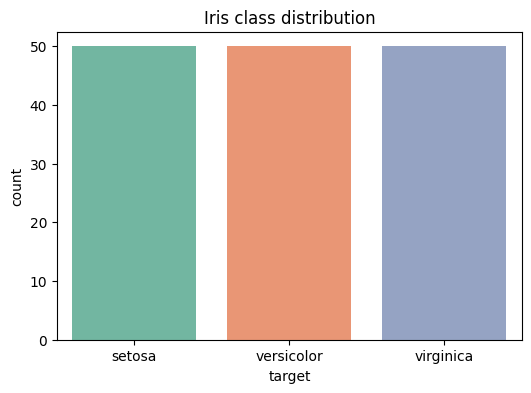

In [7]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Iris class distribution')
plt.show()

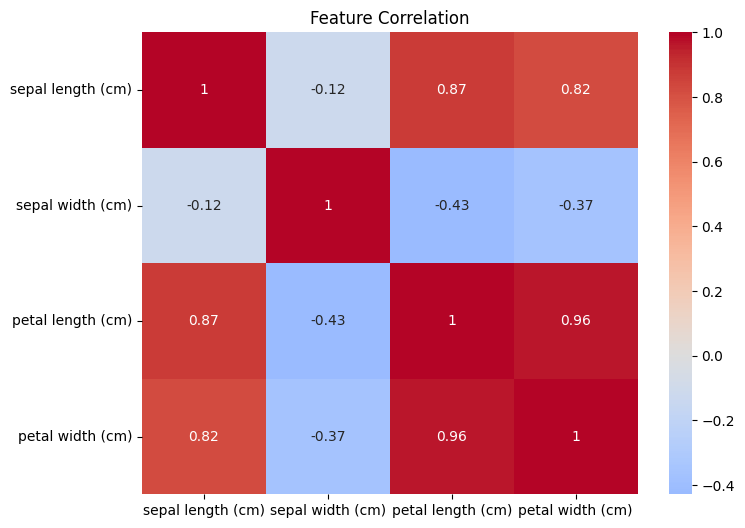

In [9]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation')
plt.show()

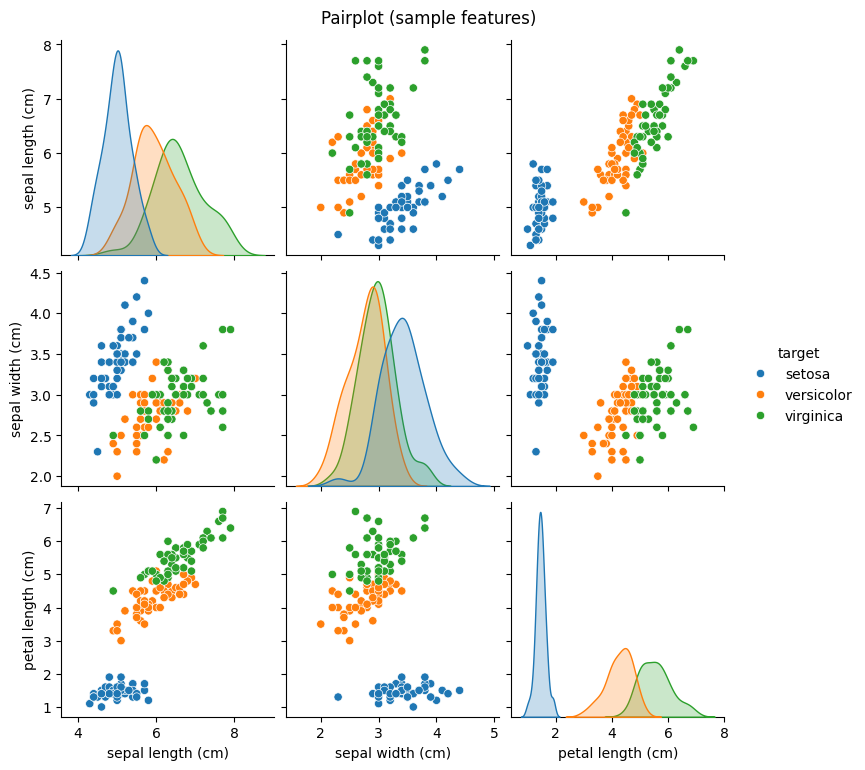

In [10]:
# Pairplot for a subset of features
sns.pairplot(df, hue='target', vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'])
plt.suptitle('Pairplot (sample features)', y=1.02)
plt.show()

In [11]:
# Preprocessing: discretize continuous features into categorical bins
df_cat = df.copy()
labels = ['Low', 'Medium', 'High']

for col in iris.feature_names:
    df_cat[col] = pd.cut(df_cat[col], bins=3, labels=labels)

# Keep the target as an item as well (optional)
df_cat['target'] = df['target']

display(df_cat.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,Low,Medium,Low,Low,setosa
1,Low,Medium,Low,Low,setosa
2,Low,Medium,Low,Low,setosa
3,Low,Medium,Low,Low,setosa
4,Low,Medium,Low,Low,setosa


In [12]:
# One-hot encode (0/1 indicator matrix) for FP-Growth
encoded_df = pd.get_dummies(df_cat)
print("Encoded shape:", encoded_df.shape)
display(encoded_df.head())


Encoded shape: (150, 15)


,sepal length (cm)_Low,sepal length (cm)_Medium,sepal length (cm)_High,sepal width (cm)_Low,sepal width (cm)_Medium,sepal width (cm)_High,petal length (cm)_Low,petal length (cm)_Medium,petal length (cm)_High,petal width (cm)_Low,petal width (cm)_Medium,petal width (cm)_High,target_setosa,target_versicolor,target_virginica
0,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
2,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
3,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
4,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False


In [13]:
# FP-Growth to obtain frequent itemsets
min_support = 0.15
frequent_itemsets = fpgrowth(encoded_df, min_support=min_support, use_colnames=True)

frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).reset_index(drop=True)
print(f"Found {len(frequent_itemsets)} frequent itemsets with min_support={min_support}")
display(frequent_itemsets.head(30))


Found 80 frequent itemsets with min_support=0.15


,support,itemsets
0,0.586667,(sepal width (cm)_Medium)
1,0.473333,(sepal length (cm)_Medium)
2,0.393333,(sepal length (cm)_Low)
3,0.360000,(petal length (cm)_Medium)
4,0.360000,(petal width (cm)_Medium)
5,0.333333,(target_setosa)
6,0.333333,(petal length (cm)_Low)
7,0.333333,(petal width (cm)_Low)
8,0.333333,(target_virginica)
9,0.333333,(target_versicolor)


In [14]:
# Generate association rules from frequent itemsets
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Sort and prettify for display
rules = rules.sort_values(by=['lift','confidence','support'], ascending=[False, False, False]).reset_index(drop=True)
rules['antecedents_str'] = rules['antecedents'].apply(lambda s: ', '.join(sorted(list(s))))
rules['consequents_str'] = rules['consequents'].apply(lambda s: ', '.join(sorted(list(s))))

display(rules[['antecedents_str','consequents_str','support','confidence','lift']].head(30))
print("Total rules generated:", len(rules))


,antecedents_str,consequents_str,support,confidence,lift
0,"sepal width (cm)_Medium, target_virginica","petal length (cm)_High, petal width (cm)_High",0.173333,0.896552,3.362069
1,"petal length (cm)_High, petal width (cm)_High","sepal width (cm)_Medium, target_virginica",0.173333,0.650000,3.362069
2,"sepal width (cm)_Medium, target_setosa","petal length (cm)_Low, sepal length (cm)_Low",0.240000,1.000000,3.191489
3,"petal length (cm)_Low, sepal width (cm)_Medium","sepal length (cm)_Low, target_setosa",0.240000,1.000000,3.191489
4,"petal width (cm)_Low, sepal width (cm)_Medium","sepal length (cm)_Low, target_setosa",0.240000,1.000000,3.191489
5,"sepal width (cm)_Medium, target_setosa","petal width (cm)_Low, sepal length (cm)_Low",0.240000,1.000000,3.191489
6,"petal length (cm)_Low, sepal width (cm)_Medium...","petal width (cm)_Low, sepal length (cm)_Low",0.240000,1.000000,3.191489
7,"petal width (cm)_Low, sepal width (cm)_Medium,...","petal length (cm)_Low, sepal length (cm)_Low",0.240000,1.000000,3.191489
8,"petal length (cm)_Low, petal width (cm)_Low, s...","sepal length (cm)_Low, target_setosa",0.240000,1.000000,3.191489
9,"sepal width (cm)_Medium, target_setosa","petal length (cm)_Low, petal width (cm)_Low, s...",0.240000,1.000000,3.191489


Total rules generated: 276


In [15]:
# Print top rules in readable format
for i, row in rules.head(20).iterrows():
    print(f"Rule {i+1}: IF [{row['antecedents_str']}] THEN [{row['consequents_str']}], "
          f"support={row['support']:.3f}, confidence={row['confidence']:.3f}, lift={row['lift']:.3f}")


Rule 1: IF [sepal width (cm)_Medium, target_virginica] THEN [petal length (cm)_High, petal width (cm)_High], support=0.173, confidence=0.897, lift=3.362
Rule 2: IF [petal length (cm)_High, petal width (cm)_High] THEN [sepal width (cm)_Medium, target_virginica], support=0.173, confidence=0.650, lift=3.362
Rule 3: IF [sepal width (cm)_Medium, target_setosa] THEN [petal length (cm)_Low, sepal length (cm)_Low], support=0.240, confidence=1.000, lift=3.191
Rule 4: IF [petal length (cm)_Low, sepal width (cm)_Medium] THEN [sepal length (cm)_Low, target_setosa], support=0.240, confidence=1.000, lift=3.191
Rule 5: IF [petal width (cm)_Low, sepal width (cm)_Medium] THEN [sepal length (cm)_Low, target_setosa], support=0.240, confidence=1.000, lift=3.191
Rule 6: IF [sepal width (cm)_Medium, target_setosa] THEN [petal width (cm)_Low, sepal length (cm)_Low], support=0.240, confidence=1.000, lift=3.191
Rule 7: IF [petal length (cm)_Low, sepal width (cm)_Medium, target_setosa] THEN [petal width (cm)_Lo

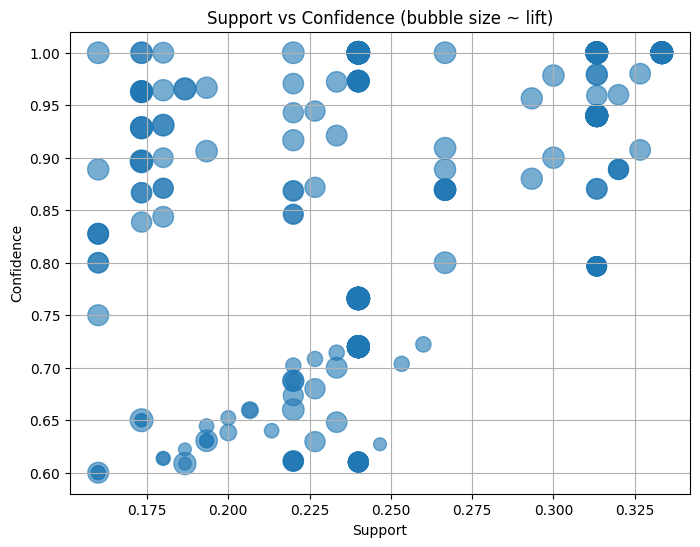

In [16]:
# Visualize: Support vs Confidence (bubble size = lift)
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*80, alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (bubble size ~ lift)')
plt.grid(True)
plt.show()


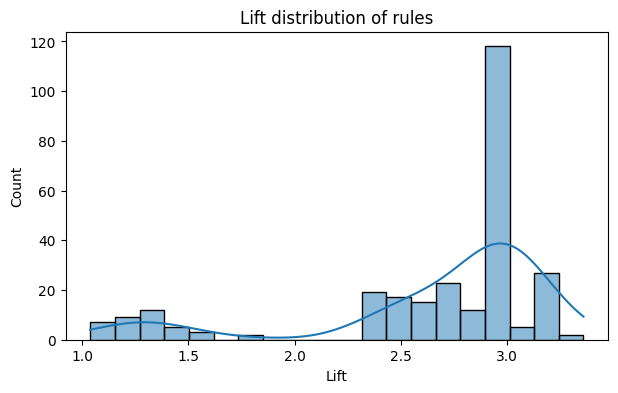

/tmp/ipython-input-3255654303.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ante, x='count', y='item', palette='viridis')


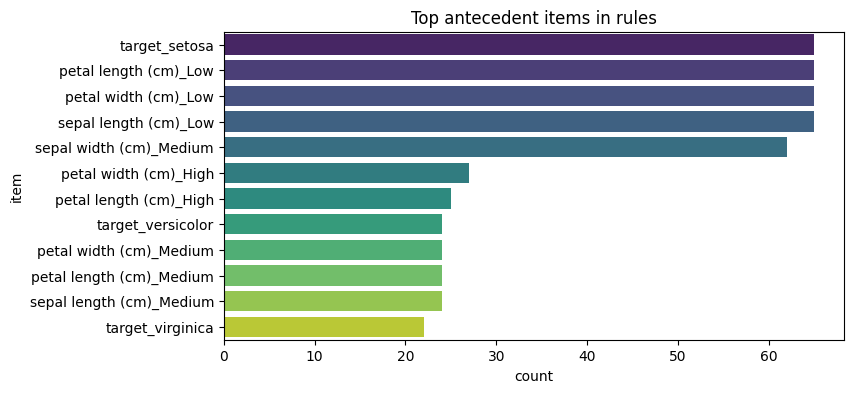

In [17]:
plt.figure(figsize=(7,4))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title('Lift distribution of rules')
plt.xlabel('Lift')
plt.show()

# Which item columns appear most in antecedents?
from collections import Counter
ante_count = Counter()
for s in rules['antecedents']:
    for itm in s:
        ante_count[itm] += 1

top_ante = pd.DataFrame(ante_count.most_common(12), columns=['item','count'])
plt.figure(figsize=(8,4))
sns.barplot(data=top_ante, x='count', y='item', palette='viridis')
plt.title('Top antecedent items in rules')
plt.show()


In [18]:
# Filter for strong / interesting rules
strong_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.2)].copy()
print("Strong rules count:", len(strong_rules))
display(strong_rules[['antecedents_str','consequents_str','support','confidence','lift']].reset_index(drop=True))



Strong rules count: 236


,antecedents_str,consequents_str,support,confidence,lift
0,"sepal width (cm)_Medium, target_virginica","petal length (cm)_High, petal width (cm)_High",0.173333,0.896552,3.362069
1,"sepal width (cm)_Medium, target_setosa","petal length (cm)_Low, sepal length (cm)_Low",0.240000,1.000000,3.191489
2,"petal length (cm)_Low, sepal width (cm)_Medium","sepal length (cm)_Low, target_setosa",0.240000,1.000000,3.191489
3,"petal width (cm)_Low, sepal width (cm)_Medium","sepal length (cm)_Low, target_setosa",0.240000,1.000000,3.191489
4,"sepal width (cm)_Medium, target_setosa","petal width (cm)_Low, sepal length (cm)_Low",0.240000,1.000000,3.191489
...,...,...,...,...,...
231,"petal length (cm)_Low, petal width (cm)_Low",sepal width (cm)_Medium,0.240000,0.720000,1.227273
232,"petal length (cm)_Low, target_setosa",sepal width (cm)_Medium,0.240000,0.720000,1.227273
233,petal length (cm)_Low,sepal width (cm)_Medium,0.240000,0.720000,1.227273
234,"petal width (cm)_Low, target_setosa",sepal width (cm)_Medium,0.240000,0.720000,1.227273


In [19]:
#Save frequent itemsets and rules to CSV
frequent_itemsets.to_csv('iris_frequent_itemsets.csv', index=False)
rules_out = rules[['antecedents_str','consequents_str','support','confidence','lift']]
rules_out.to_csv('iris_fpgrowth_rules.csv', index=False)
print("Saved: iris_frequent_itemsets.csv and iris_fpgrowth_rules.csv")


Saved: iris_frequent_itemsets.csv and iris_fpgrowth_rules.csv


**Conclusion:-**

The FP-Growth algorithm efficiently discovers hidden relationships within data by identifying frequent itemsets and association rules without generating unnecessary candidates. It provides faster performance than Apriori and helps uncover meaningful co-occurrence patterns. Overall, FP-Growth is a powerful unsupervised learning technique for extracting valuable insights from large categorical datasets.